In [80]:
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from scipy import stats
from IPython.display import display

In [81]:
dataset = pandas.read_csv('../data/bike_' + \
                      'sharing_hourly.csv')
dataset_frame = dataset
dataset_array = dataset.drop('dteday', 1).values
dataset_array = dataset_array.astype(np.float64)
del dataset

In [92]:
for i, e in enumerate(dataset_frame):
    print(str(i) + ':' + ' ' + str(e))
display(dataset_frame.head())
display(dataset_frame.tail())

0: instant
1: dteday
2: season
3: yr
4: mnth
5: hr
6: holiday
7: weekday
8: workingday
9: weathersit
10: temp
11: atemp
12: hum
13: windspeed
14: casual
15: registered
16: cnt


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,10.66,13.635,56.0,8.9981,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,10.66,13.635,65.0,8.9981,12,37,49


In [83]:
display(dataset_frame.describe().drop('instant', 1))
better_frame = dataset_frame
better_frame['temp'] = better_frame['temp'] * 41.0
better_frame['atemp'] = better_frame['atemp'] * 50.0
better_frame['hum'] = better_frame['hum'] * 100.0
better_frame['windspeed'] = better_frame['windspeed'] * 67.0
better_frame = better_frame.drop('instant', 1)
display(better_frame.describe())

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [84]:
i, j = np.where(dataset_array == np.nan)
print(i, '-', j);

[] - []


In [85]:
import sklearn.linear_model as model
import sklearn.metrics

In [86]:
print(dataset_array.shape)

(17379, 16)


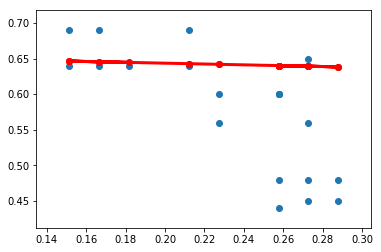

In [134]:
classif = model.LinearRegression()
# .reshape(-1, 1) transpose
x = dataset_array[:, 10].reshape(-1, 1)
y = dataset_array[:, 11]
x_train = x[:-20, :]
x_test =  x[-20:, :]
y_train = y[:-20]
y_test = y[-20:]
classif.fit(x_train, y_train)
y_predicted = classif.predict(x_test)
plt.figure()
ax = plt.scatter(x_test, y_test)
plt.plot(x_test, y_predicted, '-ro', linewidth=3)